In [1]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh
import matplotlib.pyplot as plt

# Reducción no lineal de dimensión: Análisis de Componentes Principales por Núcleos (KPCA)

--------------

**Algorithm 1.4** Kernel PCA

--------------

1. Obtener la matriz de núcleos $\mathbf{K}$ donde debe calcularse:
2. Centrar la matriz
3. 

In [2]:
def rbf_kpca(X, gamma, n_components):
    """docstring"""
    # Obtener las distancias cuadradas de todas las parejas de vectores
    sq_dists = pdist(X, 'sqeuclidean')
    # Convertir a una matriz
    mat_sq_dists = squareform(sq_dists)
    # Obtener matriz de núcleos
    K = np.exp(-gamma * mat_sq_dists)
    # Centrar la matriz
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    # Obtener los eigenpares, scipy.linalg.eigh los devuelve ordenados (ascendente)
    eigenvals, eigenvecs = eigh(K)
    eigenvals, eigenvecs = eigenvals[::-1], eigenvecs[:,::-1] # Invertir los eigenpares
    # Seleccionar los k primeros eigenpares
    alphas = np.column_stack([eigenvecs[:,i] for i in range(n_components)])
    lambdas = np.column_stack([eigenvals[i] for i in range (n_components)])
    return alphas, lambdas

Medias lunas

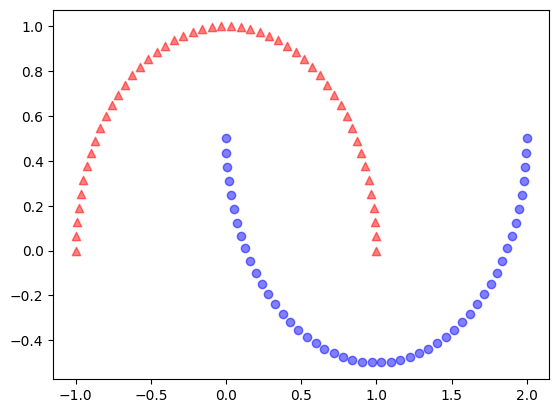

In [3]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y==0,0], X[y==0,1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1,0], X[y==1,1], color='blue', marker='o', alpha=0.5)
plt.show()

Intentamos separar los datos con PCA

In [4]:
from sklearn.decomposition import PCA

In [5]:
# No es necesario estandarizar porque los ejes tienen rangos similares
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

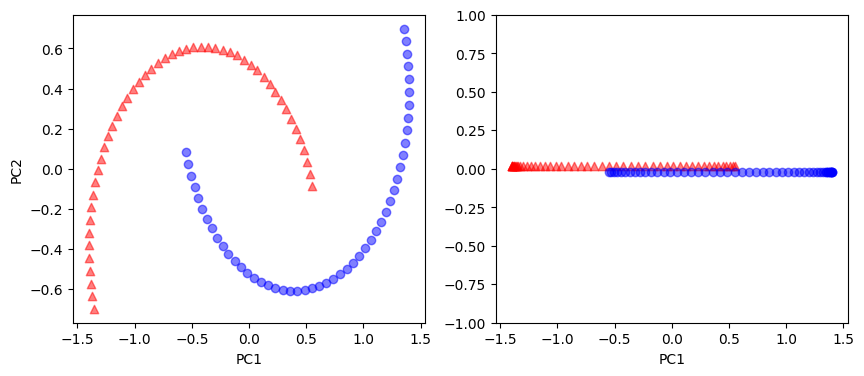

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(X_pca[y==0,0], X_pca[y==0,1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_pca[y==1,0], X_pca[y==1,1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_pca[y==0,0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_pca[y==1,0], np.zeros((50,1))-0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_ylabel('PC2')
ax[0].set_xlabel('PC1')
ax[1].set_xlabel('PC1')
ax[1].set_ylim((-1,1))
plt.show()

In [7]:
X_kpca, _ = rbf_kpca(X, gamma=15, n_components=2)

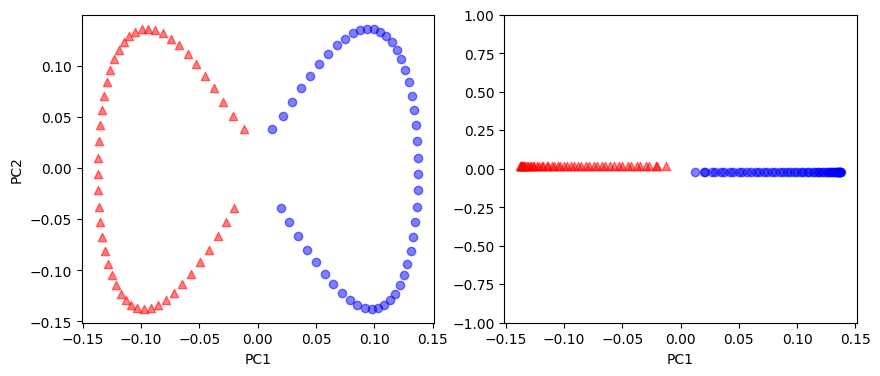

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(X_kpca[y==0,0], X_kpca[y==0,1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1,0], X_kpca[y==1,1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0,0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1,0], np.zeros((50,1))-0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_ylabel('PC2')
ax[0].set_xlabel('PC1')
ax[1].set_xlabel('PC1')
ax[1].set_ylim((-1,1))
plt.show()

Modo bootcamp

In [9]:
from sklearn.decomposition import KernelPCA

In [10]:
X, y = make_moons(n_samples=100, random_state=123)

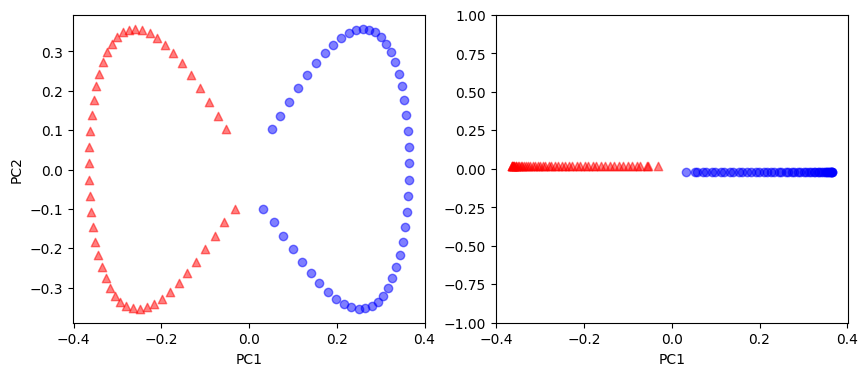

In [11]:
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(X_kpca[y==0,0], X_kpca[y==0,1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1,0], X_kpca[y==1,1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0,0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1,0], np.zeros((50,1))-0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_ylabel('PC2')
ax[0].set_xlabel('PC1')
ax[1].set_xlabel('PC1')
ax[1].set_ylim((-1,1))
plt.show()

Make circles

In [12]:
from sklearn.datasets import make_circles

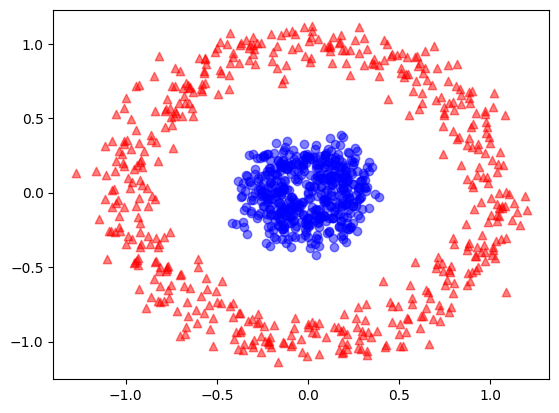

In [13]:
X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
plt.scatter(X[y==0,0], X[y==0,1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1,0], X[y==1,1], color='blue', marker='o', alpha=0.5)
plt.show()

Tarea moral: Aplicar pca y kpca (casero y sklearn con otros kernels)

Probar kernel polinomial con medias lunas